In [ ]:
!nvidia-smi

Tue Feb 21 05:26:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install -q transformers[sentencepiece] fastai fastbook ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-q50zf6by
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-q50zf6by
  Resolved https://github.com/huggingface/transformers to commit 8b3db33a763ccef828fca89bac7e6cbff314f131
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.27.0.dev0-py3-none-any.whl size=6614774 sha256=8936c35ec2941256859e002ed15efcac96fbcf5bd91a223eaa6e194cb6575473
  Stored in directory: /tmp/pip-ephem-wheel-cache-gm4jyqn7/wheels/42/68/45/c63edff61c292f2dfd4df4ef6522dcbecc603e7af82813c1d7
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.26.1
    Uninstalling transformers-

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.8/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# go to your project directory
%cd /content/drive/MyDrive/

# Data

In [ ]:
df = pd.read_csv("movies_and_tvseries.csv")

In [ ]:
df.shape

(25326, 3)

In [ ]:
genres_list = df.genres.to_list()

genre_count = {}
for genres in genres_list:

  try:
    genre_list = eval(genres)
    for genre in genre_list:
      if genre in genre_count.keys():
        genre_count[genre] += 1
      else:
        genre_count[genre] = 1
  except:
    if genres in genre_count.keys():
      genre_count[genres] += 1
    else:
      genre_count[genres] = 1
  

print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 28
{'Fantasy': 2963, 'Comedy': 5251, 'Family': 1190, 'Drama': 10244, 'Horror': 1476, 'Animation': 2735, 'Short': 264, 'Adventure': 4878, 'Sci-Fi': 1565, 'Documentary': 665, 'History': 646, 'Musical': 108, 'Music': 122, 'Thriller': 2837, 'Game-Show': 54, 'War': 358, 'Reality-TV': 175, 'Western': 195, 'Talk-Show': 31, 'Biography': 355, 'Romance': 959, 'Sport': 259, 'Mystery': 1568, 'News': 24, 'Crime': 5596, 'Action': 15030, 'Film-Noir': 6, 'Adult': 1}


In [ ]:
threshhold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshhold]
len(rare_genres), rare_genres[:5]

(9, ['Musical', 'Music', 'Game-Show', 'Reality-TV', 'Western'])

In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []
for idx, genres in enumerate(genres_list):
  
  try:
    genre_list = eval(genres)
    revised_genres = []

    for genre in genre_list:
      if genre not in rare_genres:
        revised_genres.append(genre)
    
    if len(revised_genres) == 0:
      indices_to_drop.append(idx)

    else:
      revised_genre_list.append(revised_genres)
  except:
    revised_genres = []
    if genres not in rare_genres:
      revised_genres.append(genres)
    
    if len(revised_genres) == 0:
      indices_to_drop.append(idx)

    else:
      revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(25322, 3)

In [ ]:
df["revised_genres"] = revised_genre_list

In [ ]:
df.head(10)

,title,description,genres,revised_genres
0,A Court of Thorns and Roses,A huntress agrees to travel to a magical realm with a faerie lord in return for her family's safety.,Fantasy,[Fantasy]
1,Sabrina the Teenage Witch,"When a sixteen-year-old high school student finds out she's a witch, her two aunts offer guidance on how to control her newly-discovered magical powers.","['Comedy', 'Family', 'Fantasy']","[Comedy, Family, Fantasy]"
2,Sweet Home,"Hyun, a loner high school student who lost his entire family in a terrible accident, is forced to leave his home and has to face a new reality where monsters are trying to wipe out all of humanity. Now he must fight against all odds to try and race against the clock to save what is left of the human race before it's too late.","['Drama', 'Fantasy', 'Horror']","[Drama, Fantasy, Horror]"
3,The Amazing World of Gumball,The life of a twelve-year-old boy who happens to be a blue cat as he lives with his family and other strange creatures.,"['Animation', 'Short', 'Adventure']","[Animation, Short, Adventure]"
4,Wizards of Waverly Place,"The Russo family may be an ordinary family with an average restaurant, but behind close doors, all three children must compete to be the next family wizard.","['Adventure', 'Comedy', 'Drama']","[Adventure, Comedy, Drama]"
5,Good Witch,"""Good Witch"" will take viewers on a new magical journey with Cassie Nightingale and her daughter Grace. When Dr. Sam Radford moves in next door to Grey House with his son, they are charmed by the 'magical' mother-daughter duo.","['Comedy', 'Drama', 'Fantasy']","[Comedy, Drama, Fantasy]"
6,Motherland: Fort Salem,A trio of witches is trained to become powerful weapons for the American military.,"['Drama', 'Fantasy', 'Sci-Fi']","[Drama, Fantasy, Sci-Fi]"
7,The Shannara Chronicles,"Series of adventures, war, and evil that occur throughout the history of the Four Lands.","['Adventure', 'Drama', 'Fantasy']","[Adventure, Drama, Fantasy]"
8,Tales of the Walking Dead,"An episodic anthology that will follow individual characters from the The Walking Dead TV universe, both new and old.","['Drama', 'Fantasy', 'Horror']","[Drama, Fantasy, Horror]"
9,H2O: Just Add Water,Three girls become mermaids after a mysterious island transforms them and gives them special powers.,"['Drama', 'Family', 'Fantasy']","[Drama, Family, Fantasy]"


In [ ]:
revised_genre_list = df.revised_genres.to_list()

revised_genre_count = {}
for genres in revised_genre_list:
    genre_list = genres
    for genre in genre_list:
      if genre in revised_genre_count.keys():
        revised_genre_count[genre] += 1
      else:
        revised_genre_count[genre] = 1
  

print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 19
{'Fantasy': 2963, 'Comedy': 5251, 'Family': 1190, 'Drama': 10244, 'Horror': 1476, 'Animation': 2735, 'Short': 264, 'Adventure': 4878, 'Sci-Fi': 1565, 'Documentary': 665, 'History': 646, 'Thriller': 2837, 'War': 358, 'Biography': 355, 'Romance': 959, 'Sport': 259, 'Mystery': 1568, 'Crime': 5596, 'Action': 15030}


In [ ]:
encode_genre_types = { key: idx  for idx, (key, value) in enumerate(revised_genre_count.items()) }
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * (len(encode_genre_types))
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:19]

[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df["genre_cat_list"] = categorical_genre_list
df.head()

,title,description,genres,revised_genres,genre_cat_list
0,A Court of Thorns and Roses,A huntress agrees to travel to a magical realm with a faerie lord in return for her family's safety.,Fantasy,[Fantasy],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Sabrina the Teenage Witch,"When a sixteen-year-old high school student finds out she's a witch, her two aunts offer guidance on how to control her newly-discovered magical powers.","['Comedy', 'Family', 'Fantasy']","[Comedy, Family, Fantasy]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Sweet Home,"Hyun, a loner high school student who lost his entire family in a terrible accident, is forced to leave his home and has to face a new reality where monsters are trying to wipe out all of humanity. Now he must fight against all odds to try and race against the clock to save what is left of the human race before it's too late.","['Drama', 'Fantasy', 'Horror']","[Drama, Fantasy, Horror]","[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,The Amazing World of Gumball,The life of a twelve-year-old boy who happens to be a blue cat as he lives with his family and other strange creatures.,"['Animation', 'Short', 'Adventure']","[Animation, Short, Adventure]","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Wizards of Waverly Place,"The Russo family may be an ordinary family with an average restaurant, but behind close doors, all three children must compete to be the next family wizard.","['Adventure', 'Comedy', 'Drama']","[Adventure, Comedy, Drama]","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
encode_genre_types

{'Fantasy': 0,
 'Comedy': 1,
 'Family': 2,
 'Drama': 3,
 'Horror': 4,
 'Animation': 5,
 'Short': 6,
 'Adventure': 7,
 'Sci-Fi': 8,
 'Documentary': 9,
 'History': 10,
 'Thriller': 11,
 'War': 12,
 'Biography': 13,
 'Romance': 14,
 'Sport': 15,
 'Mystery': 16,
 'Crime': 17,
 'Action': 18}

# Dataloaders and Modeling

In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True, vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader("description"), get_y=ColReader("genre_cat_list"), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-plot-classifier.pkl")

In [ ]:
dls.vocab

['Fantasy', 'Comedy', 'Family', 'Drama', 'Horror', 'Animation', 'Short', 'Adventure', 'Sci-Fi', 'Documentary', 'History', 'Thriller', 'War', 'Biography', 'Romance', 'Sport', 'Mystery', 'Crime', 'Action']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Selina, (Ua Kijijini,Mwiba Mjini) is a Kenyan Swahili soap opera and telenovela that airs on Maisha Magic East on Gotv channel 4. It tells the story of Selina (played by Celestine Gachuhi) an intelligent young woman of humble beginnings who has excelled in her fourth form exams and is bound to join university. Her mischievous stepmother, Kristina, crafts a wicked plot to sell her off to work as a... See full summary »",[Drama]
1,"Rhiannon is a fantasy drama series that seamlessly transports the viewer between the concrete modern world and King Arthur's Camelot. After rediscovering her past life as Rhiannon, a magical fairy-princess from King Arthur's kingdom, Joy Williams (16) embraces her destiny to become the protector of Earth and Camelot. Every day with the help of Merlin, the elves and her friends from our world, she... See full summary »","[Fantasy, Drama, Adventure]"
2,"In this modern-day western, rumor has it that notorious gangster Frank Lowies hid millions in cash before getting tossed in the slammer. Going on little more than cryptic tattoos on a sexy stripper's body, every gunslinging scoundrel in the desert hot town of Copenhagen is on the hunt, their brows dripping with sweat and blood, and their pistols blazing in unflinchingly graphic showdowns -- but... See full summary »","[Comedy, Action]"
3,"When an American cop witnesses his mentor's murder in a trade deal gone wrong, he finds himself on the wrong side of the law in Thailand. But despite the bounty on his head and pressure to leave the country, he teams up with an ex-military mercenary out to settle a score of his own to bring the killers to justice. Their quest for vengeance brings them face-to-face with a band of notorious... See full summary »",[Action]


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage-0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0006918309954926372, valley=0.0002290867705596611)

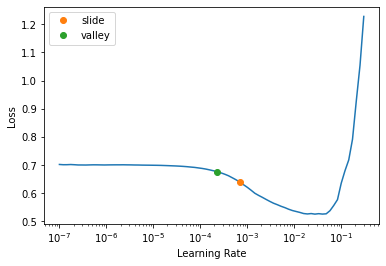

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2, 4.5e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.214942,0.210796,0.872786,00:39
1,0.210284,0.206237,0.879189,00:37


In [ ]:
learner.save("plot-classifier-stage-0")

Path('models/plot-classifier-stage-0.pth')

In [ ]:
learner.export("models/plot-classifier-stage-0.pkl")

# Stage-1

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.004365158267319202, valley=2.2908675418875646e-06)

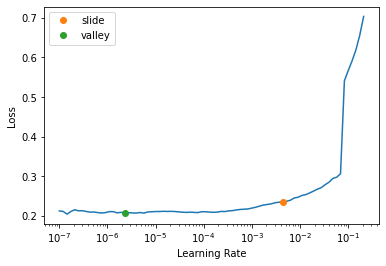

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3, slice(1.9e-6, 1.8e-4))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.207063,0.207773,0.878835,01:08
1,0.195375,0.199978,0.881537,01:10
2,0.180880,0.198795,0.885071,01:07


In [ ]:
learner.save("plot-classifier-stage-1")

Path('models/plot-classifier-stage-1.pth')

In [ ]:
learner.export("models/plot-classifier-stage-1.pkl")